# Import necessary libraries

In [1]:
# Install required library
!pip install -q torch_snippets

from torch_snippets import *
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.utils import make_grid

# Set device to GPU if available, else use CPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 105.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 45.0 MB/s eta

# Load MNIST datasets for training and testing

In [2]:
train_dataset = datasets.MNIST(root='MNIST/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='MNIST/', train=False, transform=transforms.ToTensor(), download=True)


100%|██████████| 9912422/9912422 [00:00<00:00, 69556005.63it/s]


Extracting MNIST/MNIST/raw/train-images-idx3-ubyte.gz to MNIST/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 115038645.61it/s]

Extracting MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 19307076.66it/s]


Extracting MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21648328.15it/s]


Extracting MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/MNIST/raw



# Create data loaders for training and testing

In [3]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


# Display the first sample from the training dataset

In [4]:
train_dataset[0][0]


tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

# Define the Variational Autoencoder (VAE) model

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()

        # Encoder network
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 256)
        self.fc21 = nn.Linear(256, 20)  # mu
        self.fc22 = nn.Linear(256, 20)  # logvar

        # Decoder network
        self.fc3 = nn.Linear(20, 256)
        self.fc4 = nn.Linear(256, 64 * 7 * 7)
        self.deconv1 = nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.deconv2 = nn.ConvTranspose2d(32, 1, kernel_size=3, stride=2, padding=1, output_padding=1)

    def encode(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        mu = self.fc21(x)
        logvar = self.fc22(x)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        if self.training:
            std = torch.exp(0.5 * logvar)
            eps = Variable(torch.randn(std.size())).cuda()
            return eps.mul(std).add_(mu)
        else:
            return mu

    def decode(self, z):
        z = F.relu(self.fc3(z))
        z = F.relu(self.fc4(z))
        z = z.view(z.size(0), 64, 7, 7)
        z = F.relu(self.deconv1(z))
        z = torch.sigmoid(self.deconv2(z))
        return z

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        z = self.decode(z)
        return z, mu, logvar


# Train and Validate a  Batch

In [6]:
# Function to train a batch
def train_batch(data, model, optimizer, loss_function):
    model.train()
    data = data.to(device)
    optimizer.zero_grad()
    recon_batch, mean, log_var = model(data)
    loss, mse, kld = loss_function(recon_batch, data, mean, log_var)
    loss.backward()
    optimizer.step()
    return loss, mse, kld, log_var.mean(), mean.mean()

# Function to validate a batch
@torch.no_grad()
def validate_batch(data, model, loss_function):
    model.eval()
    data = data.to(device)
    recon, mean, log_var = model(data)
    loss, mse, kld = loss_function(recon, data, mean, log_var)
    return loss, mse, kld, log_var.mean(), mean.mean()


# Loss function for VAE

In [7]:
def loss_function(recon_x, x, mean, log_var):
    RECON = F.mse_loss(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + log_var - mean.pow(2) - log_var.exp())
    return RECON + KLD, RECON, KLD


# Training

EPOCH: 1.000  val_log_var: -0.939  val_kld: 599.656  train_mean: -0.005  train_kld: 409.012  val_loss: 1783.122  train_recon: 2318.375  train_log_var: -0.603  val_mean: -0.001  val_recon: 1183.466  train_loss: 2727.386  (31.60s - 284.40s remaining)


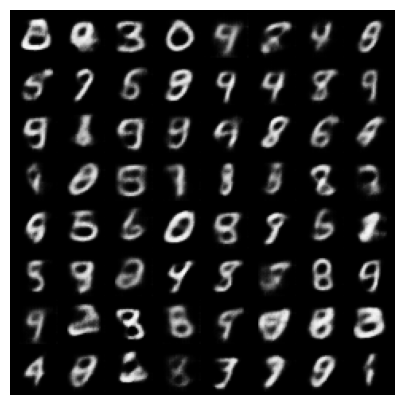

EPOCH: 2.000  val_log_var: -1.112  val_kld: 719.180  train_mean: -0.004  train_kld: 665.973  val_loss: 1658.842  train_recon: 1360.223  train_log_var: -1.031  val_mean: -0.009  val_recon: 939.662  train_loss: 2026.196  (44.43s - 177.72s remaining)


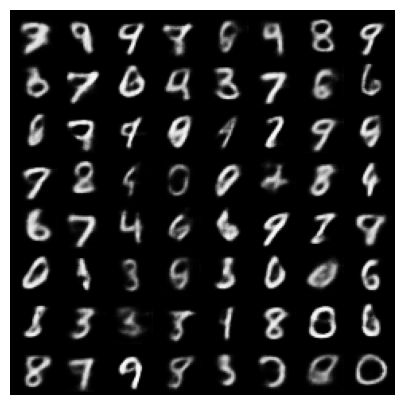

EPOCH: 3.000  val_log_var: -1.109  val_kld: 710.815  train_mean: -0.003  train_kld: 708.289  val_loss: 1564.190  train_recon: 1214.456  train_log_var: -1.102  val_mean: -0.019  val_recon: 853.375  train_loss: 1922.745  (57.65s - 134.52s remaining)


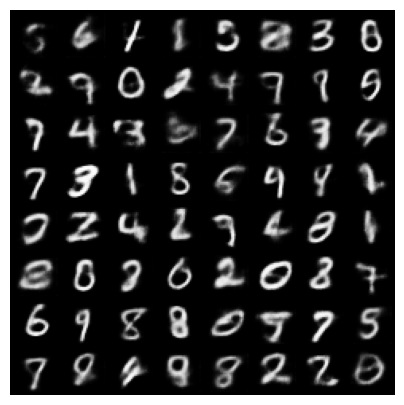

EPOCH: 4.000  val_log_var: -1.136  val_kld: 713.543  train_mean: -0.003  train_kld: 730.922  val_loss: 1524.491  train_recon: 1145.824  train_log_var: -1.140  val_mean: -0.005  val_recon: 810.948  train_loss: 1876.746  (70.50s - 105.75s remaining)


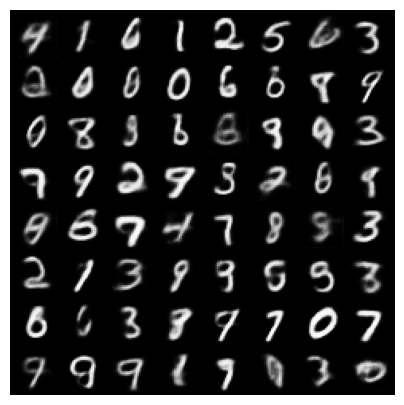

EPOCH: 5.000  val_log_var: -1.195  val_kld: 760.437  train_mean: -0.002  train_kld: 743.752  val_loss: 1527.063  train_recon: 1104.682  train_log_var: -1.161  val_mean: 0.002  val_recon: 766.626  train_loss: 1848.434  (83.13s - 83.13s remaining)


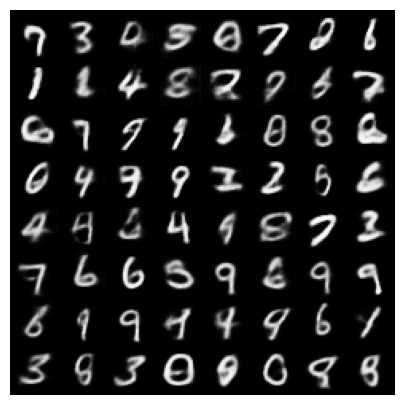

EPOCH: 6.000  val_log_var: -1.172  val_kld: 737.050  train_mean: -0.001  train_kld: 751.922  val_loss: 1482.371  train_recon: 1076.499  train_log_var: -1.174  val_mean: -0.004  val_recon: 745.322  train_loss: 1828.421  (96.03s - 64.02s remaining)


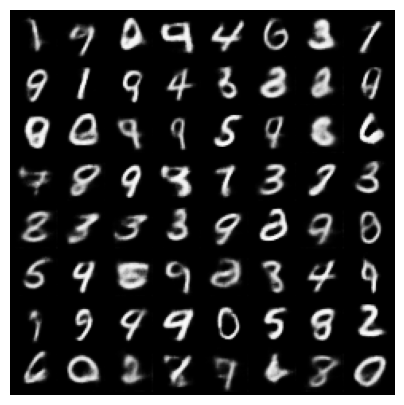

EPOCH: 7.000  val_log_var: -1.154  val_kld: 728.983  train_mean: -0.001  train_kld: 758.452  val_loss: 1466.010  train_recon: 1055.204  train_log_var: -1.185  val_mean: -0.018  val_recon: 737.027  train_loss: 1813.656  (109.30s - 46.84s remaining)


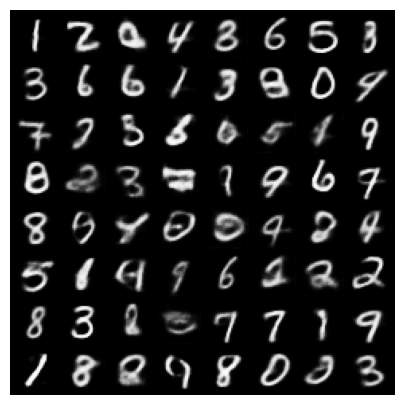

EPOCH: 8.000  val_log_var: -1.187  val_kld: 757.671  train_mean: -0.001  train_kld: 761.569  val_loss: 1485.436  train_recon: 1040.041  train_log_var: -1.190  val_mean: -0.008  val_recon: 727.765  train_loss: 1801.610  (123.47s - 30.87s remaining)


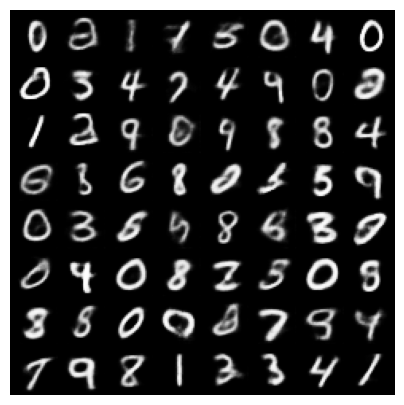

EPOCH: 9.000  val_log_var: -1.183  val_kld: 740.927  train_mean: -0.002  train_kld: 765.143  val_loss: 1451.398  train_recon: 1025.879  train_log_var: -1.196  val_mean: 0.003  val_recon: 710.470  train_loss: 1791.021  (136.52s - 15.17s remaining)


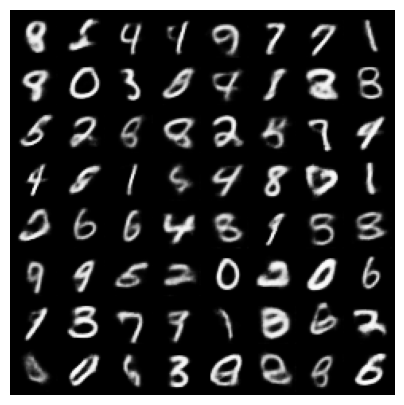

EPOCH: 10.000  val_log_var: -1.205  val_kld: 762.564  train_mean: -0.000  train_kld: 768.370  val_loss: 1469.725  train_recon: 1013.199  train_log_var: -1.201  val_mean: -0.010  val_recon: 707.161  train_loss: 1781.569  (149.35s - 0.00s remaining)


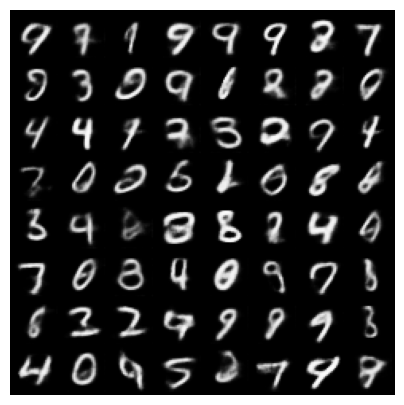

In [8]:
# Training setup
n_epochs = 10
log = Report(n_epochs)
vae = VAE().to(device)
optimizer = optim.AdamW(vae.parameters(), lr=1e-3)

# Training loop
for epoch in range(n_epochs):
    N = len(train_loader)

    # Training
    for batch_idx, (data, _) in enumerate(train_loader):
        loss, recon, kld, log_var, mean = train_batch(data, vae, optimizer, loss_function)
        pos = epoch + (1+batch_idx)/N
        log.record(pos, train_loss=loss, train_kld=kld, train_recon=recon, train_log_var=log_var, train_mean=mean, end='\r')

    N = len(test_loader)

    # Validation
    for batch_idx, (data, _) in enumerate(test_loader):
        loss, recon, kld, log_var, mean = validate_batch(data, vae, loss_function)
        pos = epoch + (1+batch_idx)/N
        log.record(pos, val_loss=loss, val_kld=kld, val_recon=recon, val_log_var=log_var, val_mean=mean, end='\r')

    log.report_avgs(epoch+1)

    # Generate samples and visualize
    with torch.no_grad():
        z = torch.randn(64, 20).to(device)
        sample = vae.decode(z).to(device)
        images = make_grid(sample.view(64, 1, 28, 28)).permute(1,2,0)
        show(images)


# Plot training and validation losses

100%|██████████| 111/111 [00:00<00:00, 418.63it/s]


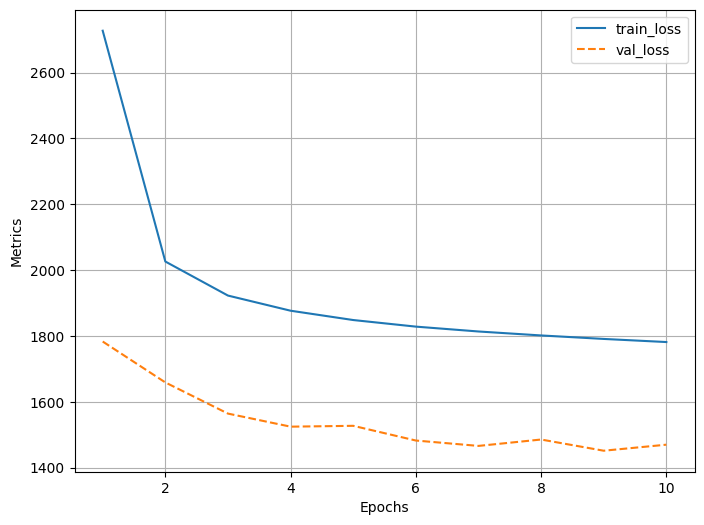

In [9]:
log.plot_epochs(['train_loss','val_loss'])
